# Import requirements

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from collections import Counter
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [2]:
DF = pd.read_csv('/Users/greg/Desktop/FullNeuroIllumina/complete_data.csv')
DF.head()

,Patient,Visit,GDS,Prot,AAPos,Coverage,A,R,N,D,...,L,K,M,F,P,S,T,W,Y,V
0,A0001,R09,0.583333,Tat1,1,38938,0.000051,0.002157,0.000051,0.000077,...,0.006934,0.001695,0.565052,0.000026,0,0.000848,0.000128,0.416637,0,0.000205
1,A0010,R08,1.416667,Tat1,1,171,0.000000,0.000000,0.000000,0.000000,...,0.005848,0.005848,0.584795,0.000000,0,0.000000,0.000000,0.403509,0,0.000000
2,A0013,R09,0.000000,Tat1,1,602,0.000000,0.001661,0.000000,0.000000,...,0.001661,0.004983,0.282392,0.000000,0,0.001661,0.000000,0.209302,0,0.000000
3,A0019,R12,0.250000,Tat1,1,1485,0.000000,0.001347,0.000673,0.000000,...,0.008081,0.003367,0.526599,0.000000,0,0.001347,0.000673,0.452525,0,0.000000
4,A0026,R09,0.583333,Tat1,1,334,0.000000,0.002994,0.000000,0.000000,...,0.008982,0.000000,0.589820,0.000000,0,0.002994,0.000000,0.389222,0,0.000000


# Define functions

In [157]:
def slice_position(df, pos):
    m = df['AAPos'] == pos
    sliced_df = df[m]
    return sliced_df

def GDS_split(df, parameter, threshold):
    mask1 = df[parameter] < threshold
    mask2 = df[parameter] >= threshold
    df1 = df[mask1]
    df2 = df[mask2]
    return df1, df2

def calcMeansStds(df1, df2):
    AAs = ['A','R','N','D','C','Q','E','G','H','I',
           'L','K','M','F','P','S','T','W','Y','V']
    means1 = df1[AAs].mean()
    stds1 = df1[AAs].std()
    means2 = df2[AAs].mean()
    stds2 = df2[AAs].std()
    return means1, stds1, means2, stds2

def plotVariation(means1, stds1, means2, stds2, position, savepath):
    labels = []
    m1,m2,s1,s2 = [],[],[],[]
    A = zip(list(means1.index), means1, means2, stds1, stds2)
    for aa, v1, v2, st1, st2 in A:    
        if max([v1,v2]) >= 0.05:
            labels.append(aa)
            m1.append(v1)
            m2.append(v2)
            s1.append(st1)
            s2.append(st2)
    N = len(labels)
    ind = np.arange(N)
    width = 0.35
    title_str = 'Position'+' '+str(position)
    if N>1:
        # set up the plot
        fig, ax = plt.subplots(figsize=(7,4))
        rects1 = ax.bar(ind, m1, width, color='blue')
        rects2 = ax.bar(ind + width, m2, width, color='orange')
        ax.set_xticks(ind + width)
        ax.set_xticklabels(labels, size=20)
        ax.set_ylim([0,1.0])
        ax.set_title(title_str)
        ax.legend((rects1[0], rects2[0]), ('Non-impaired', 'Impaired'), loc='best')
        fig.tight_layout()
        fig.savefig(savepath)
    return None
        #plt.show()

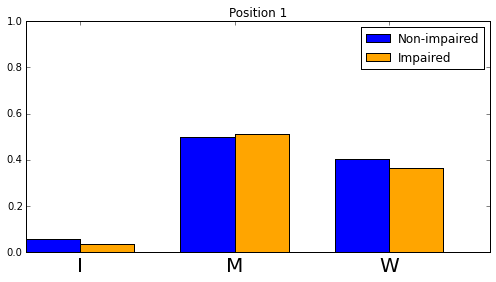

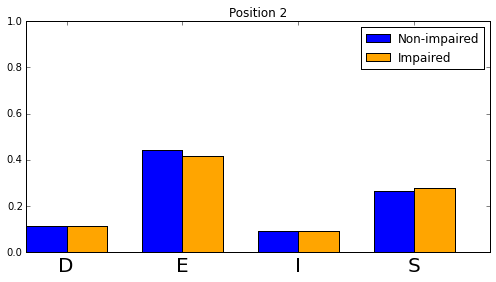

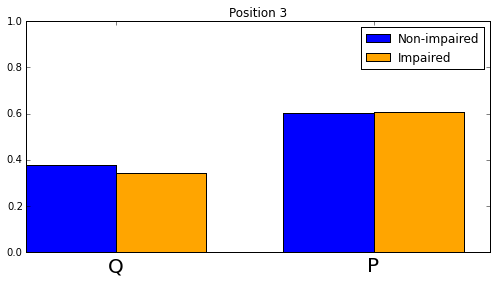

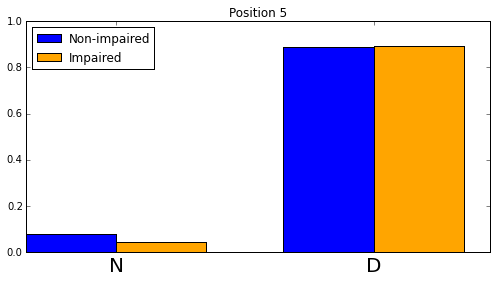

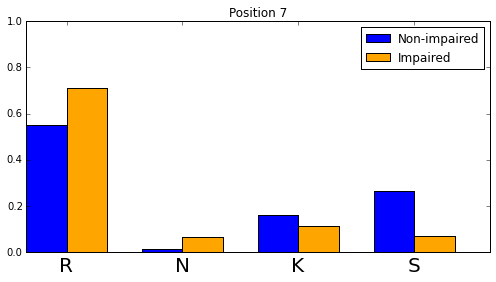

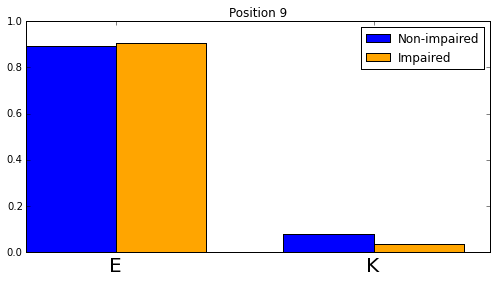

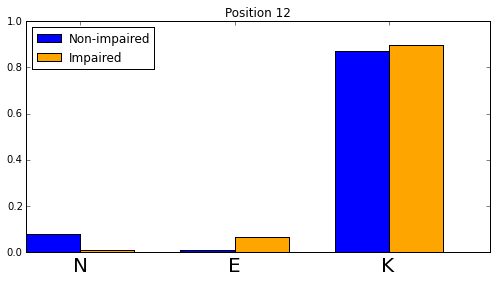

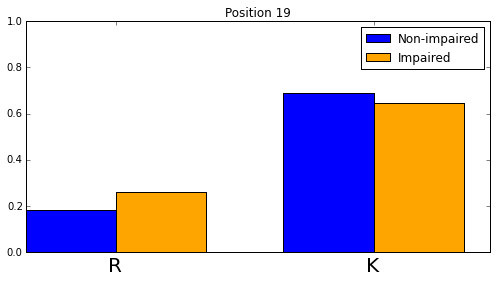

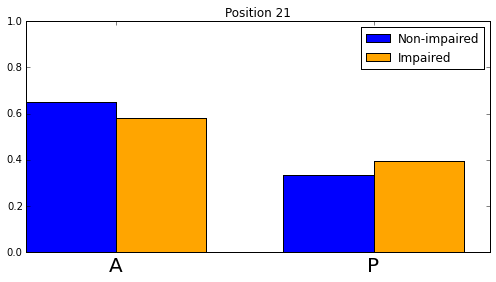

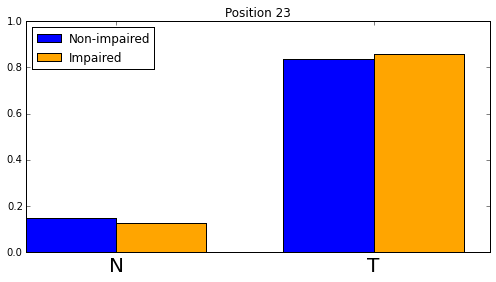

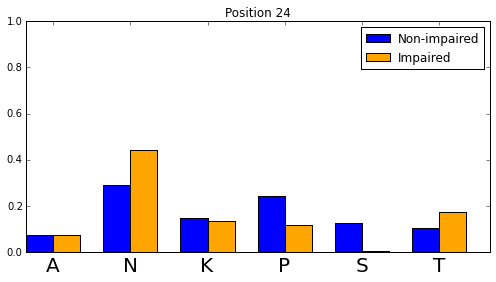

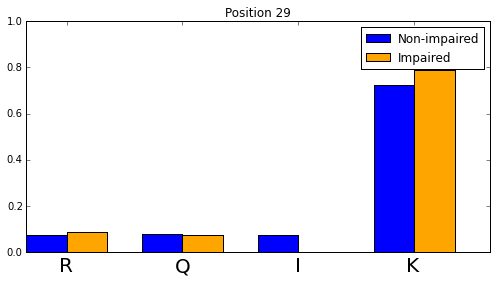

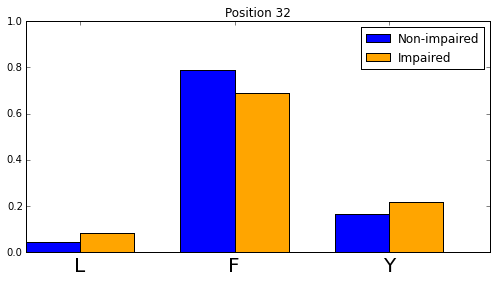

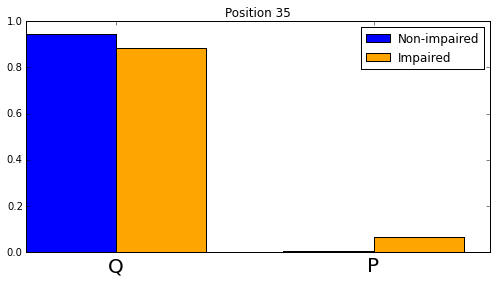

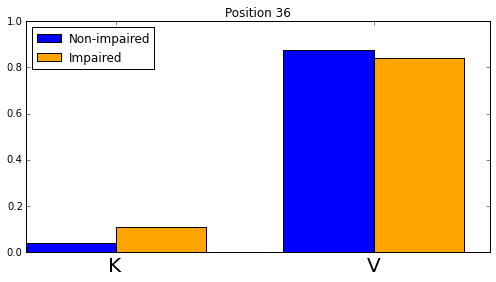

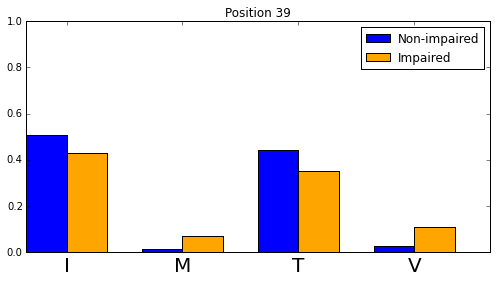

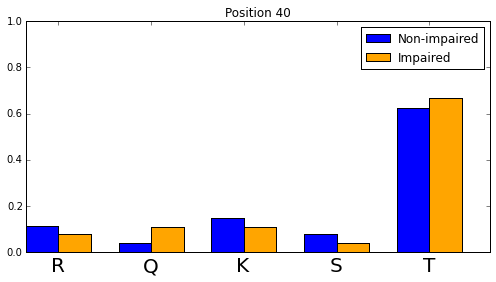

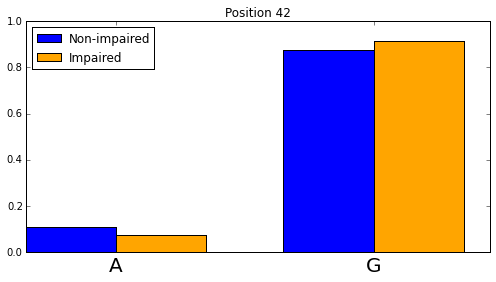

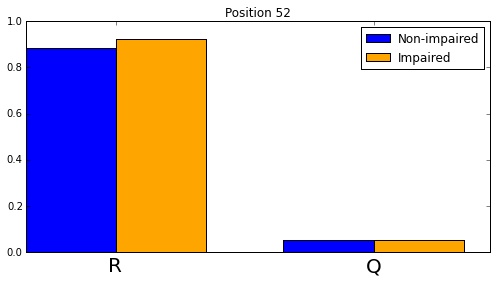

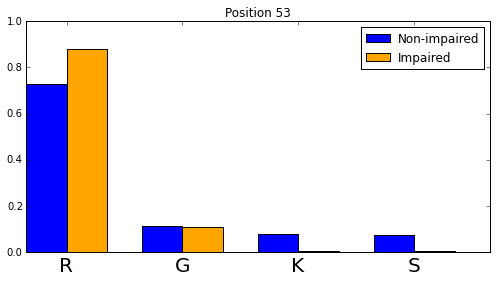

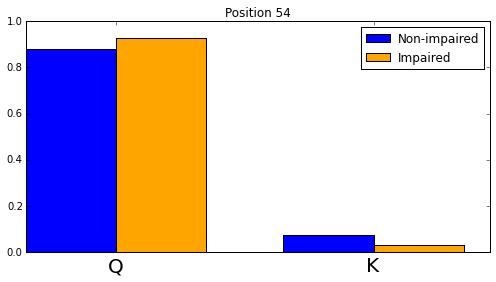

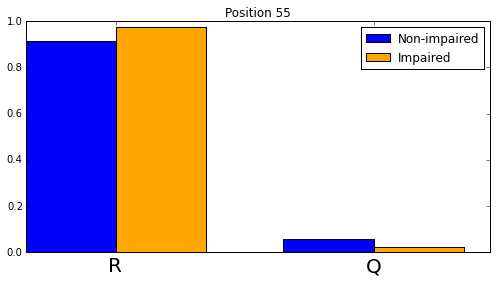

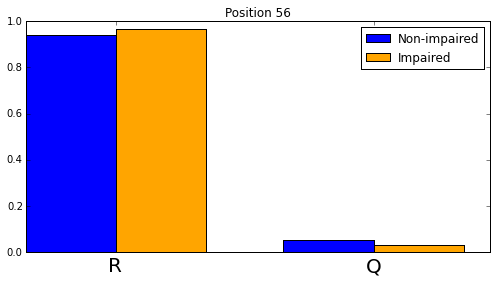

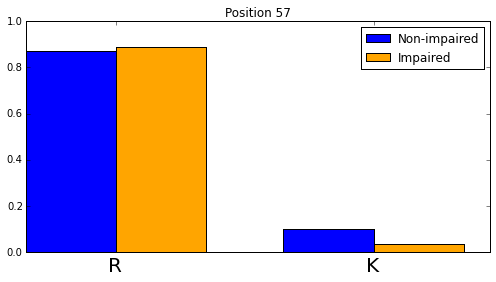

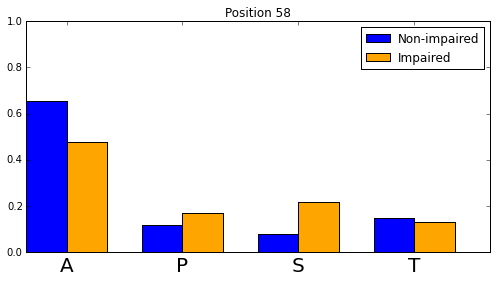

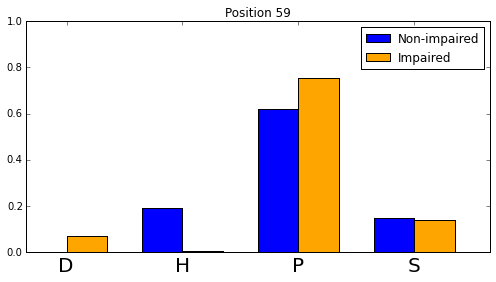

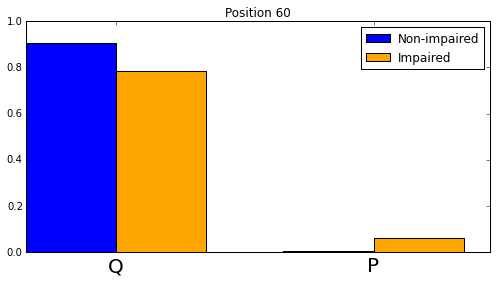

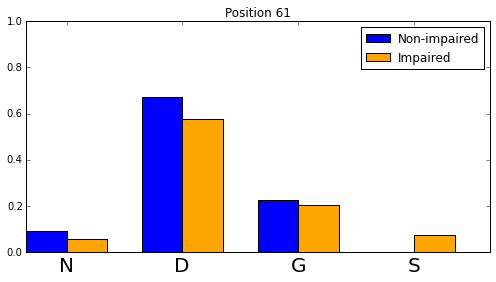

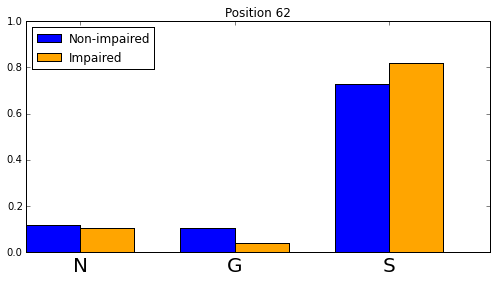

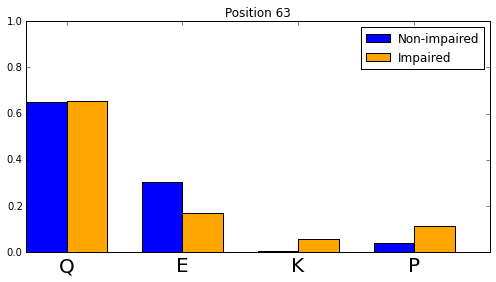

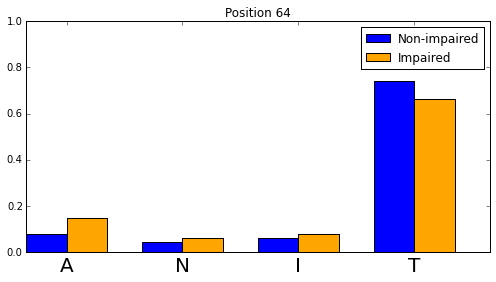

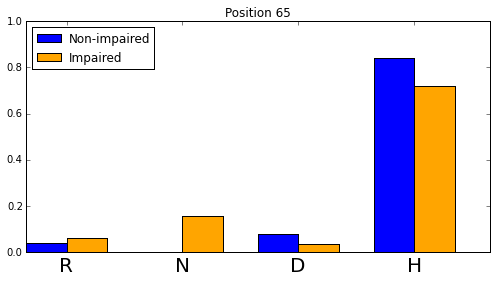

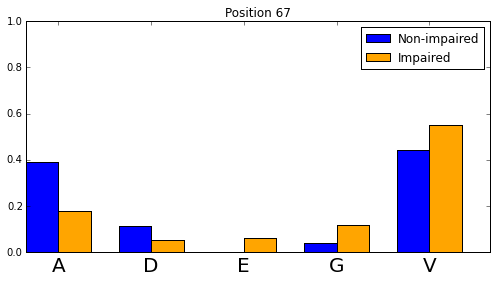

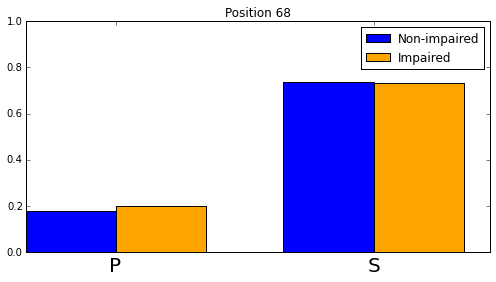

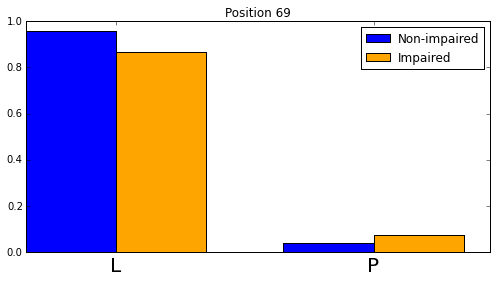

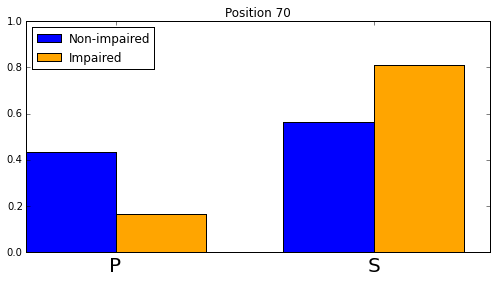

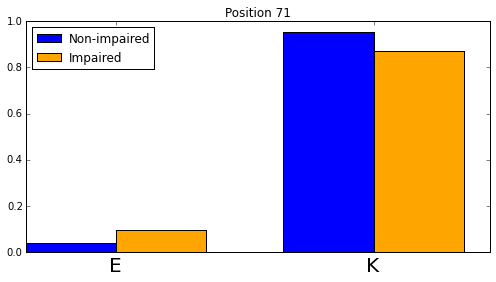

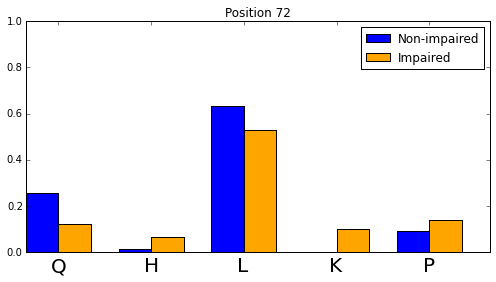

In [158]:
tat1_length = 72
for i in range(1,tat1_length+1):
    pos_df = slice_position(DF, i)
    df1, df2 = GDS_split(pos_df, 'GDS', 0.5)    
    means1, stds1, means2, stds2 = calcMeansStds(df1, df2)
    savepath = '/Users/greg/Desktop/FullNeuroIllumina/DistributionFigures/Tat1_'+str(i)+'.png'
    plotVariation(means1, stds1, means2, stds2, i, savepath)

In [33]:
# compare distributions
# means?
# chi-square?